In [1]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [2]:
time_file = '/home/robin.vanderlaag/wp5/strain_fractals/400_times.npz'
times = np.load(time_file)

In [7]:
def get_spectrogram(channel, time, duration):

    ts = TimeSeries.get(channel=channel,
                        start=time-duration,
                        end=time+duration)

    q_scan = ts.q_transform(qrange=[4,64],
                            frange=[10, 2048],
                            gps=time,
                            search=0.5,
                            tres=0.002,
                            fres=0.5,
                            whiten=True)
    return q_scan

def plot_spectrogram(q_scan, time, label):

    fig, ax  = plt.subplots(dpi=120)
    ax.imshow(q_scan)
    ax.set_yscale('log', base=2)
    ax.set_xscale('linear')
    ax.set_ylabel('Frequency (Hz)', fontsize=14)
    ax.set_xlabel('Time (s)', labelpad=0.1,  fontsize=14)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.tick_params(axis ='both', which ='major', labelsize = 14)
    ax.set_title(label+' at '+str(time)+' GPS time')
    cb = ax.colorbar(label='Normalized energy',clim=[0, 25.5])
    plt.show()

clean


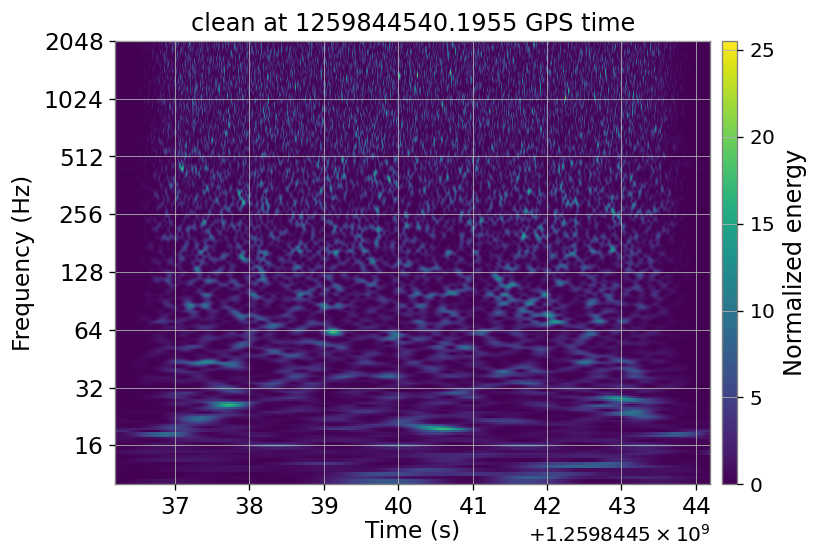

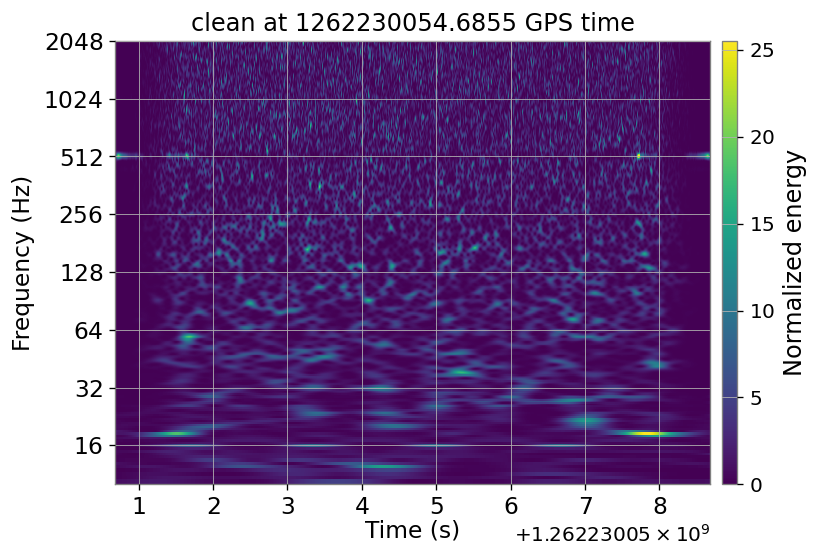

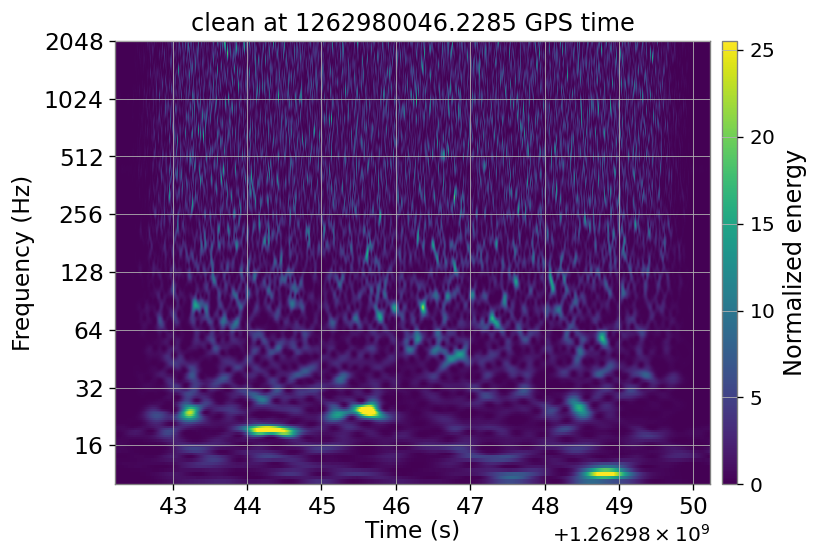

whistle


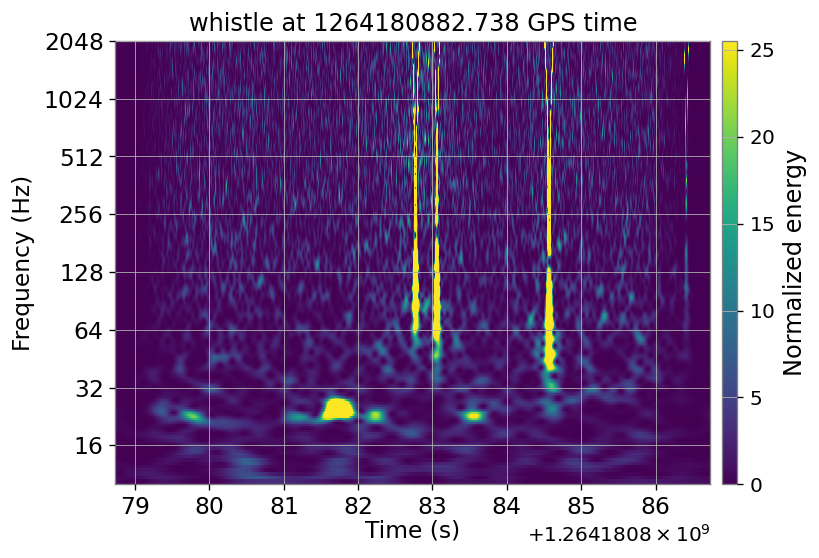

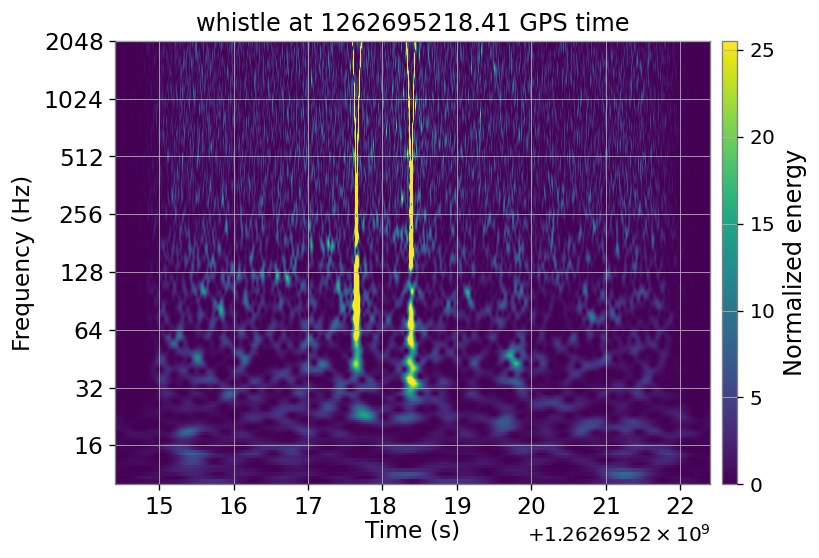

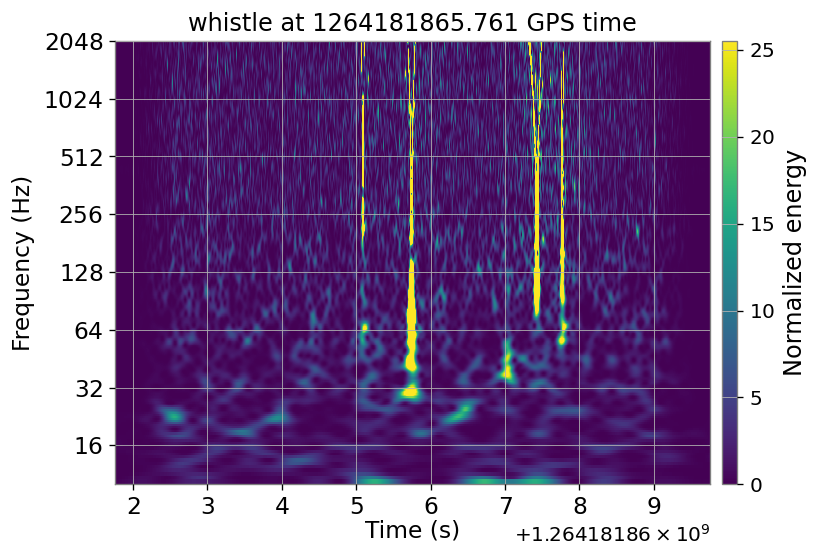

tomte


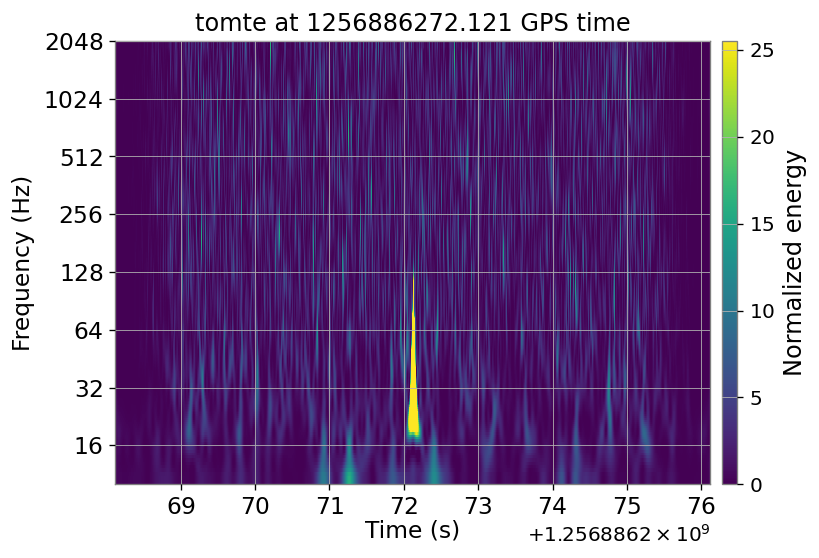

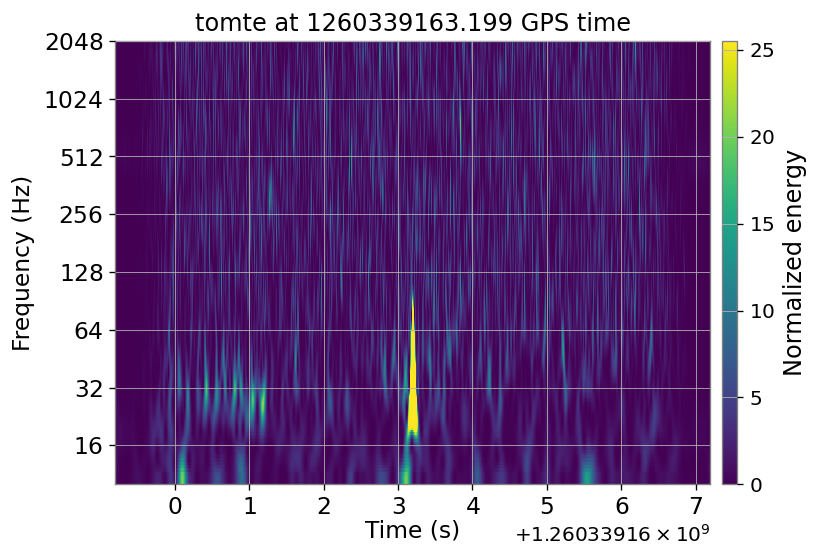

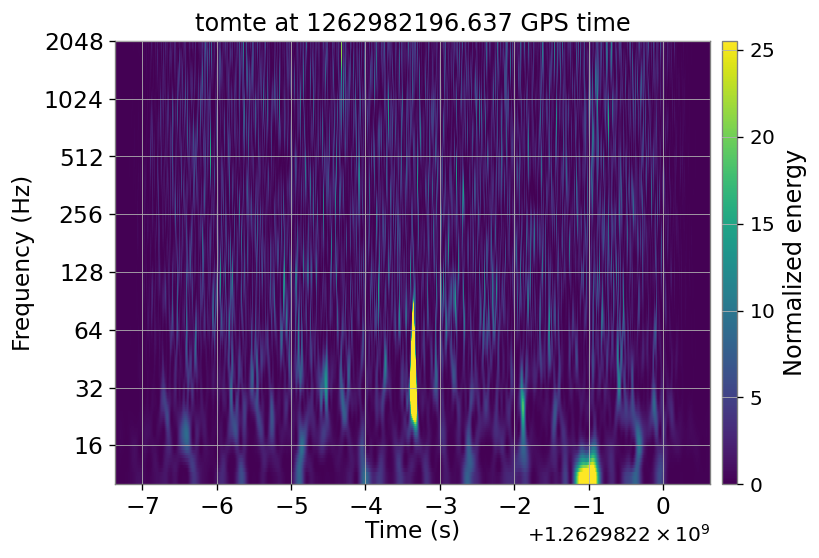

scattered_light


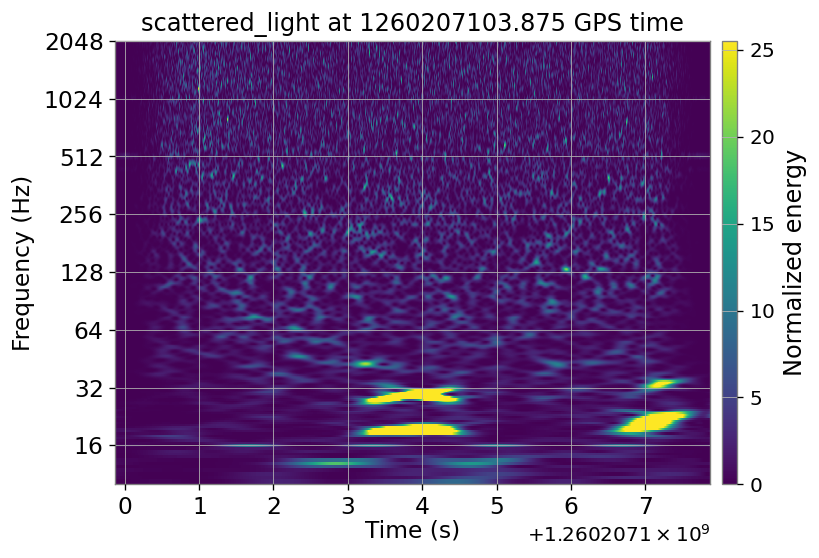

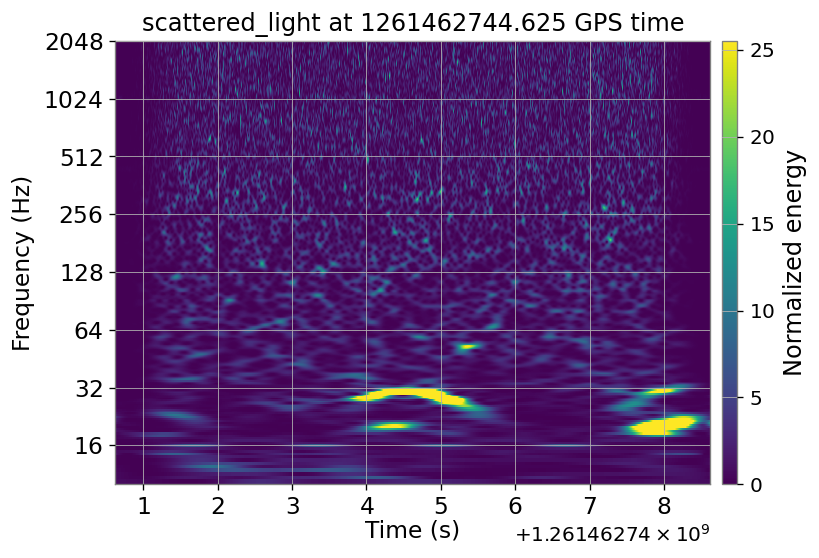

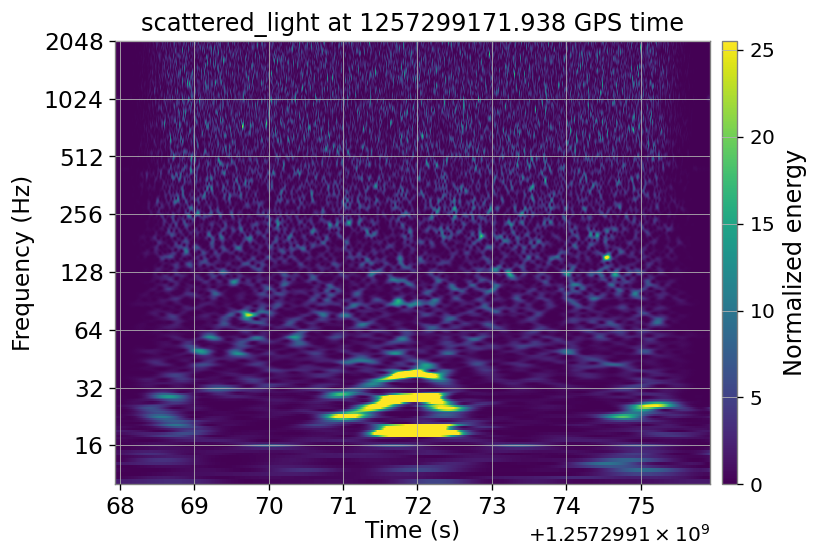

In [8]:
channel = 'L1:DCS-CALIB_STRAIN_C01'
duration = 4
for c in ['clean', 'whistle', 'tomte', 'scattered_light']:
    print(c)
    for i in range(3):
        time = times[c][i]
        q_scan = get_spectrogram(channel, time, duration)
        plot_spectrogram(q_scan, time, c)